<a href="https://colab.research.google.com/github/saifmukadam10/Linear-Regression-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings


In [162]:
df = pd.read_csv('/content/salary data.csv') # To read the file

In [163]:
df.head() #First 5 elements

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [164]:
df.tail() # Last 5 elements


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [165]:
df.size


40224

In [166]:
df.describe() # Describes the quartile


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [167]:
df.shape # No. of rows and columns

(6704, 6)

In [168]:
df.info() #No. of null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [169]:
df['Gender'].value_counts()

,count
Gender,
Male,3674
Female,3014
Other,14


In [170]:
df['Age'].value_counts()

,count
Age,
27.0,517
30.0,449
29.0,444
28.0,429
33.0,398
26.0,394
31.0,365
32.0,351
34.0,309


In [171]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [172]:
df['Job Title'].value_counts()


,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Social Media Specialist,1
Senior Software Architect,1
Developer,1


In [173]:
df['Salary'].value_counts()

,count
Salary,
140000.0,287
120000.0,282
160000.0,276
55000.0,251
170000.0,231
...,...
144496.0,1
193746.0,1
122581.0,1


In [174]:
df['Education Level'] = df['Education Level'].str.replace('phD', 'PhD')

In [175]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Remove repetition of "Degree"
df['Education Level'] = df['Education Level'].str.replace(r' Degree( Degree)*', ' Degree', regex=True)

# Get value counts
education_level_counts = df['Education Level'].value_counts()

# Display the value counts
print(education_level_counts)


Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: count, dtype: int64


In [176]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1369
Bachelor's,756
High School,448
Master's,288


In [177]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0]).map({'Female': 0, 'Male': 1, 'Other': 2}).astype(int)

In [178]:
df['Education Level']= df['Education Level'].replace({'High School': 0, "Bachelor's Degree Degree": 1, "Master's Degree Degree": 2, 'PhD': 3})

In [179]:
for column in ['Gender', 'Education Level']:
  print(f"Unique values in (column): (df[column].unique())")
# Print unique

Unique values in (column): (df[column].unique())
Unique values in (column): (df[column].unique())


In [180]:
df_new = df.drop(['Job Title'],axis ='columns')

# Convert 'Education Level' column to string type and encode before splitting
df_new['Education Level'] = df_new['Education Level'].astype(str)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_new['Education Level'] = label_encoder.fit_transform(df_new['Education Level'])

In [181]:
X =df_new.drop(['Salary'],axis ='columns')

In [182]:
Y = df_new['Salary']

In [183]:
# Fill missing values in numerical features with the mean
for col in X.select_dtypes(include='number'):
  X[col] = X[col].fillna(X[col].mean())

# Fill missing values in categorical features with the mode
for col in X.select_dtypes(include=['object']):
  X[col] = X[col].fillna(X[col].mode()[0])

In [184]:
X


,Age,Gender,Education Level,Years of Experience
0,32.0,1,2,5.0
1,28.0,0,4,3.0
2,45.0,1,1,15.0
3,36.0,0,2,7.0
4,52.0,1,4,20.0
...,...,...,...,...
6699,49.0,0,1,20.0
6700,32.0,1,0,3.0
6701,30.0,0,3,4.0
6702,46.0,1,5,14.0


In [185]:
Y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6699,200000.0
6700,50000.0
6701,55000.0
6702,140000.0


In [186]:
# Fill missing values in numerical features with the mean
for col in X.select_dtypes(include=np.number):
  X[col] = X[col].fillna(X[col].mean())

# Fill missing values in categorical features with the mode
for col in X.select_dtypes(include=['object']):
  X[col] = X[col].fillna(X[col].mode()[0])

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [188]:
from sklearn.linear_model import LinearRegression

In [191]:
reg = LinearRegression().fit(X_train,Y_train)

In [192]:
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix

In [193]:
Y_pred=reg.predict(X_test)

In [194]:
Y_pred

array([129753.71223014,  88334.93909005, 111396.74165818, ...,
       171150.60490638, 141264.08035527,  69499.11986113])

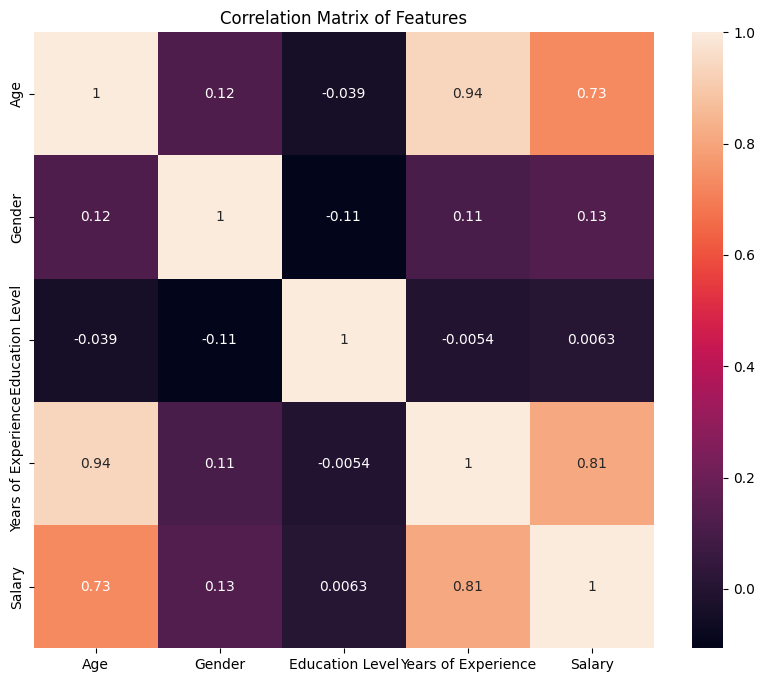

In [196]:
#Calculate the correlation matrix
correlation_matrix = df_new.corr()
#Plotting the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

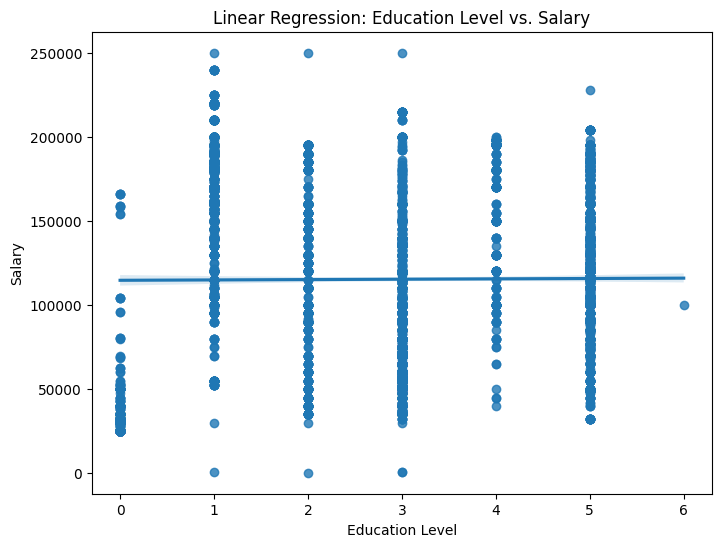

In [198]:
#prompt: plot linear regression line between Education Level and Salary
#Assuming 'df new is your DataFrame and Education Level" and "Salary are your columns
plt.figure(figsize=(8, 6))
sns.regplot(x="Education Level", y="Salary", data=df_new)
plt.title("Linear Regression: Education Level vs. Salary")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.show()

In [199]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Education Level' column to string type
X['Education Level'] = X['Education Level'].astype(str)

# Apply label encoding to the 'Education Level' column in X
X['Education Level'] = label_encoder.fit_transform(X['Education Level'])

# Display the first few rows of X to show the encoded column
display(X.head())

,Age,Gender,Education Level,Years of Experience
0,32.0,1,2,5.0
1,28.0,0,4,3.0
2,45.0,1,1,15.0
3,36.0,0,2,7.0
4,52.0,1,4,20.0


In [190]:
# Fill missing values in X_train with the mean of X_train
for col in X_train.select_dtypes(include=np.number):
    X_train[col] = X_train[col].fillna(X_train[col].mean())

# Fill missing values in Y_train with the mean of Y_train
Y_train = Y_train.fillna(Y_train.mean())

# Verify if there are any remaining NaNs in X_train and Y_train
print("Missing values in X_train after filling:")
print(X_train.isnull().sum())
print("\nMissing values in Y_train after filling:")
print(Y_train.isnull().sum())

Missing values in X_train after filling:
Age                    0
Gender                 0
Education Level        0
Years of Experience    0
dtype: int64

Missing values in Y_train after filling:
0
